# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

In [2]:
# Read in the only columns household_key, BASKET_ID, DAY, PRODUCT_ID, QUANTITY, and SALES_VALUE.

col_list = ["household_key","BASKET_ID","DAY","PRODUCT_ID","QUANTITY","SALES_VALUE"]
transactions = pd.read_csv("project_transactions.csv",usecols=col_list)
# transactions

In [3]:
transactions = (transactions
               .assign(date = (pd.to_datetime("2016", format = '%Y')
                              + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + "days"))
                      )
               .drop(["DAY"], axis = 1)
               )

In [4]:
transactions = (transactions
                .assign(year = transactions["date"].dt.year,
                       month = transactions["date"].dt.month,
                       day_of_week = transactions["date"].dt.dayofweek,
                       ))

# transactions

In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   household_key  int64         
 1   BASKET_ID      int64         
 2   PRODUCT_ID     int64         
 3   QUANTITY       int64         
 4   SALES_VALUE    float64       
 5   date           datetime64[ns]
 6   year           int64         
 7   month          int64         
 8   day_of_week    int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 147.4 MB


In [5]:
# Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.
transactions = transactions.astype({'PRODUCT_ID': 'int32', 'QUANTITY': 'int32'})
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   household_key  int64         
 1   BASKET_ID      int64         
 2   PRODUCT_ID     int32         
 3   QUANTITY       int32         
 4   SALES_VALUE    float64       
 5   date           datetime64[ns]
 6   year           int64         
 7   month          int64         
 8   day_of_week    int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(5)
memory usage: 131.0 MB


In [23]:
transactions

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date,year,month,day_of_week
0,1364,26984896261,842930,1,2.19,2016-01-01,2016,1,4
1,1364,26984896261,897044,1,2.99,2016-01-01,2016,1,4
2,1364,26984896261,920955,1,3.09,2016-01-01,2016,1,4
3,1364,26984896261,937406,1,2.50,2016-01-01,2016,1,4
4,1364,26984896261,981760,1,0.60,2016-01-01,2016,1,4
...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,92130,1,0.99,2017-12-11,2017,12,0
2146307,1598,42305362535,114102,1,8.89,2017-12-11,2017,12,0
2146308,1598,42305362535,133449,1,6.99,2017-12-11,2017,12,0
2146309,1598,42305362535,6923644,1,4.50,2017-12-11,2017,12,0


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

In [27]:
# Plot the sum of sales by month. Are sales growing over time?

transactions_1 = transactions[["month", "SALES_VALUE"]].groupby("month").sum()
transactions_1

,SALES_VALUE
month,
1,366859.17
2,395373.42
3,511033.05
4,576588.37
5,627148.82
6,593745.41
7,609341.54
8,645621.51
9,619539.15


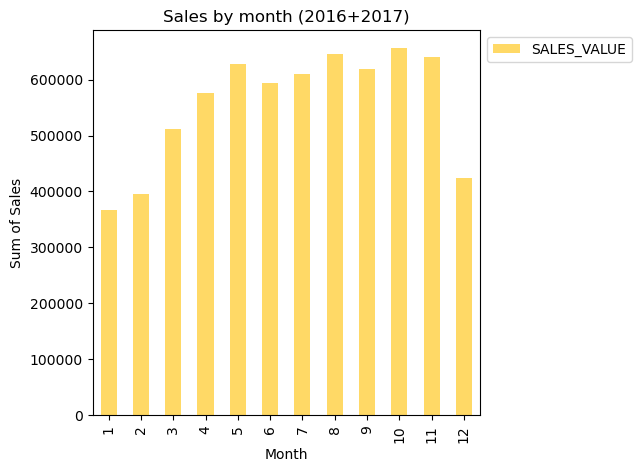

In [34]:
# visualization of transactions_1

transactions_1.plot(kind = "bar", color = "#FFD966", figsize = (5,5))

plt.title("Sales by month (2016+2017)")
plt.xlabel("Month")
plt.ylabel("Sum of Sales")
plt.legend(bbox_to_anchor = (1,1))

plt.show()

In [58]:
# Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017

transactions_2 = (transactions[["month", "year", "SALES_VALUE"]]
                  .set_index("month")
                  .pivot_table(index = "month",
                               columns = "year",
                               values = "SALES_VALUE",
                               aggfunc = "sum")
                 )

transactions_2

year,2016,2017
month,,
1,46557.97,320301.20
2,97315.16,298058.26
3,185521.82,325511.23
4,267801.38,308786.99
5,298319.14,328829.68
6,288952.45,304792.96
7,296488.02,312853.52
8,303951.35,341670.16
9,302040.56,317498.59


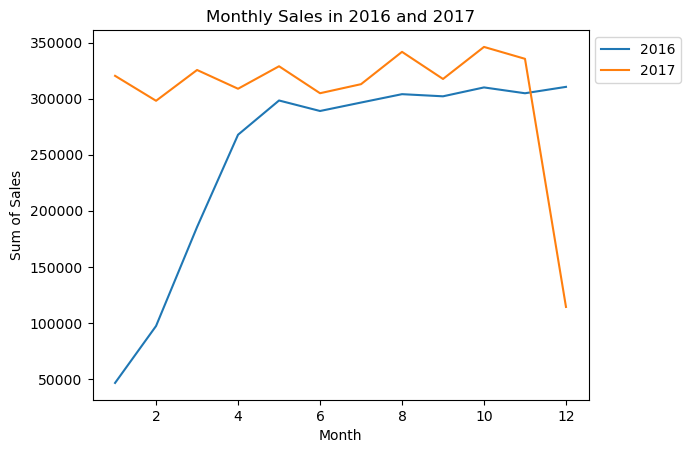

In [57]:
# visualization of transactions_2

transactions_2.plot(kind = "line")

plt.title("Monthly Sales in 2016 and 2017")
plt.xlabel("Month")
plt.ylabel("Sum of Sales")
plt.legend(bbox_to_anchor = (1,1))

plt.show()

In [59]:
# Next, plot the same series after filtering down to dates April 2016 and October 2017.

transactions_3 = (transactions[["date", "SALES_VALUE"]]
                  .groupby("date")
                  .sum()
                  .loc["04-2016":"10-2017"]
                  .round()
                 )

transactions_3

,SALES_VALUE
date,
2016-04-01,6728.0
2016-04-02,6677.0
2016-04-03,6849.0
2016-04-04,9300.0
2016-04-05,9982.0
...,...
2017-10-27,7627.0
2017-10-28,8272.0
2017-10-29,10904.0


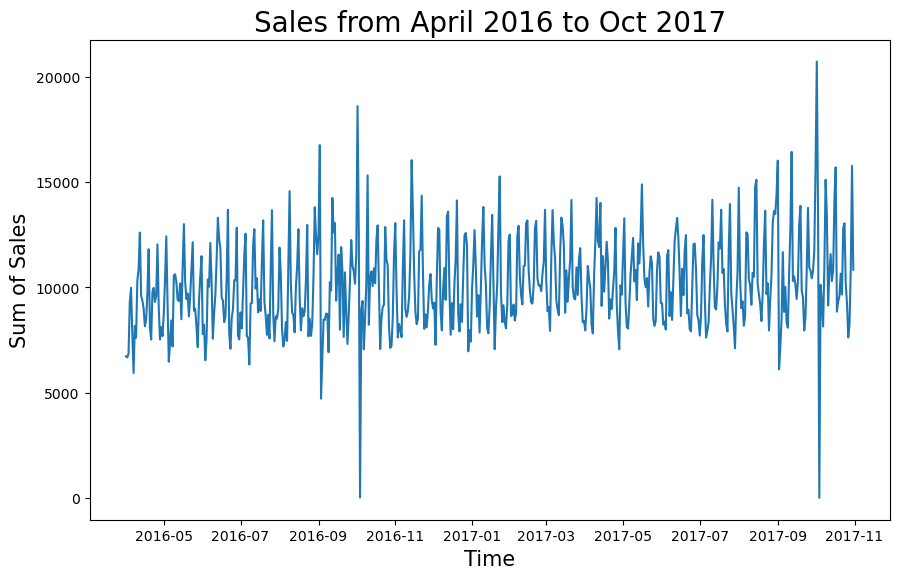

In [62]:
fig = plt.figure()
ax = fig.add_axes([0.75, 1, 1.25, 1])

ax.plot(transactions_3.index, transactions_3["SALES_VALUE"])

ax.set_title("Sales from April 2016 to Oct 2017", fontsize=20)
ax.set_xlabel("Time", fontsize = 15)
ax.set_ylabel("Sum of Sales", fontsize = 15)


plt.show()

In [63]:
# Finally, plot total sales by day of week.

transactions_4 = (transactions[["day_of_week", "SALES_VALUE"]]
                  .groupby("day_of_week")
                  .sum())

transactions_4

,SALES_VALUE
day_of_week,
0,1136462.30
1,1172457.99
2,920957.10
3,839884.07
4,832957.98
5,833944.67
6,929579.39


C:\Users\USER\AppData\Local\Temp\ipykernel_11076\3720408915.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0", "Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])


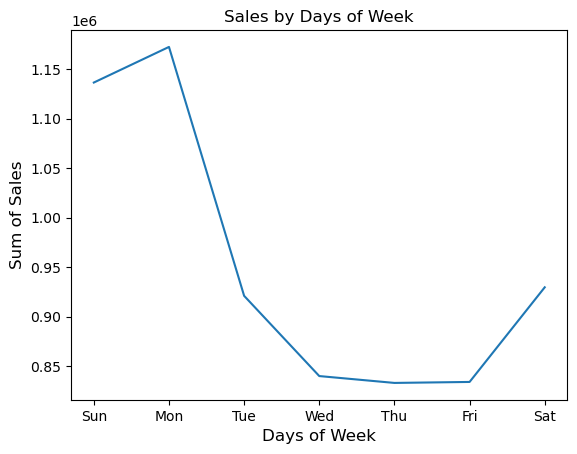

In [65]:
# Visualization of transactions_4

fig, ax = plt.subplots()

ax.plot(transactions_4.index, transactions_4["SALES_VALUE"])

ax.set_xlabel("Days of Week", fontsize = 12)
ax.set_xticklabels(["0", "Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
ax.set_ylabel("Sum of Sales", fontsize = 12)
ax.set_title("Sales by Days of Week")

plt.show()

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [6]:
# Read in the hh_demographic.csv file,
# but only the columns AGE_DESC, INCOME_DESC, household_key, and HH_COMP_DESC. 


col_list = ["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC", "MARITAL_STATUS_CODE"]
demographic = pd.read_csv("hh_demographic.csv",usecols=col_list)

In [7]:
# Convert the appropriate columns to the category dtype.
demographic = demographic.astype({"household_key": 'int16'})

demographic

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,A,35-49K,2 Adults No Kids,1
1,45-54,A,50-74K,2 Adults No Kids,7
2,25-34,U,25-34K,2 Adults Kids,8
3,25-34,U,75-99K,2 Adults Kids,13
4,45-54,B,50-74K,Single Female,16
...,...,...,...,...,...
796,35-44,U,50-74K,2 Adults No Kids,2494
797,45-54,A,75-99K,Unknown,2496
798,45-54,U,35-49K,Single Male,2497
799,25-34,U,50-74K,2 Adults No Kids,2498


In [8]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HH_COMP_DESC         801 non-null    object
 4   household_key        801 non-null    int16 
dtypes: int16(1), object(4)
memory usage: 26.7+ KB


In [9]:
# Then group the transactions table by household_id, 
# and calculate the sum of SALES VALUE by household.

transactions_hh = (transactions[["household_key", "SALES_VALUE"]]
                  .groupby("household_key")
                  .sum())

In [11]:
# Once you've done that, 
# join the demographics DataFrame to the aggregated transactions table. 
# Since we're interested in analyzing the demographic data we have, 
# make sure not to include rows from transactions that don't match.

demo_trans = transactions_hh.join(demographic, 
                                  on = "household_key",
                                  how = 'inner')

demo_trans

,SALES_VALUE,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HH_COMP_DESC,household_key
household_key,,,,,,
1,4330.16,45-54,A,50-74K,2 Adults No Kids,7
2,1954.34,25-34,U,25-34K,2 Adults Kids,8
3,2653.21,25-34,U,75-99K,2 Adults Kids,13
4,1200.11,45-54,B,50-74K,Single Female,16
5,779.06,65+,B,Under 15K,2 Adults No Kids,17
...,...,...,...,...,...,...
796,445.65,35-44,U,50-74K,2 Adults No Kids,2494
797,3059.57,45-54,A,75-99K,Unknown,2496
798,1586.58,45-54,U,35-49K,Single Male,2497


In [81]:
demo_trans.to_excel("demo_trans.xlsx")

In [12]:
# the average of sales by age groups

demographic_1 = (demo_trans[["AGE_DESC", "SALES_VALUE"]]
                .groupby("AGE_DESC")
                .mean()
                .round(2)
                )

demographic_1

,SALES_VALUE
AGE_DESC,
19-24,3107.31
25-34,3225.98
35-44,3173.52
45-54,3041.63
55-64,3256.67
65+,2589.08


<function matplotlib.pyplot.show(close=None, block=None)>

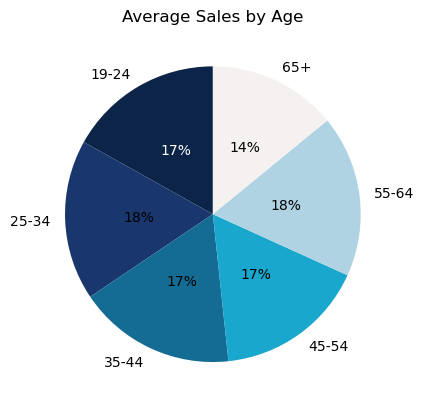

In [13]:
# Visualization of demographic_1

fig, ax = plt.subplots()

patches, text, autotexts = ax.pie(demographic_1["SALES_VALUE"],
                                labels = demographic_1.index,
                                autopct = '%.0f%%',
                                pctdistance = 0.5,
                                colors = ['#0B2447', '#19376D', '#146C94', 
                                             '#19A7CE', '#AFD3E2', '#F6F1F1'],
                                startangle = 90)
ax.set_title("Average Sales by Age")
autotexts[0].set_color('white')

plt.show

In [14]:
# The average sale by Income levels

demographic_2 = (demo_trans[["INCOME_DESC", "SALES_VALUE"]]
                .groupby("INCOME_DESC")
                .mean()
                .round(2))

demographic_2

,SALES_VALUE
INCOME_DESC,
100-124K,3076.08
125-149K,3654.22
15-24K,2984.09
150-174K,2665.81
175-199K,3796.34
200-249K,5805.05
25-34K,2825.85
250K+,1904.67
35-49K,2941.80


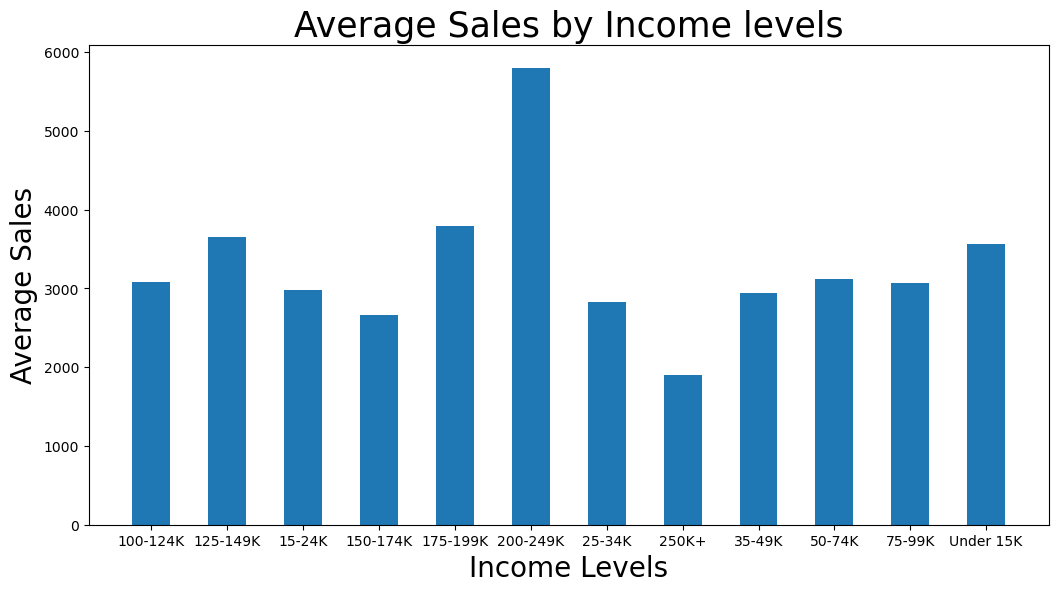

In [20]:
# Visualization of demographic_2

fig, ax = plt.subplots()
ax = fig.add_axes([0,0,1.5,1])

ax.bar(demographic_2.index,
      demographic_2["SALES_VALUE"],
      width = .5)

ax.set_xlabel("Income Levels", fontsize = 20)
ax.set_ylabel("Average Sales", fontsize = 20)
ax.set_title("Average Sales by Income levels", fontsize = 25)

plt.show()

In [16]:
# The average sales by houshold composition

demographic_3 = (demo_trans[["HH_COMP_DESC", "SALES_VALUE"]]
                .groupby("HH_COMP_DESC")
                .mean()
                .round(2))

demographic_3

,SALES_VALUE
HH_COMP_DESC,
1 Adult Kids,2709.16
2 Adults Kids,3362.69
2 Adults No Kids,3219.35
Single Female,2727.55
Single Male,3111.26
Unknown,2827.95


<function matplotlib.pyplot.show(close=None, block=None)>

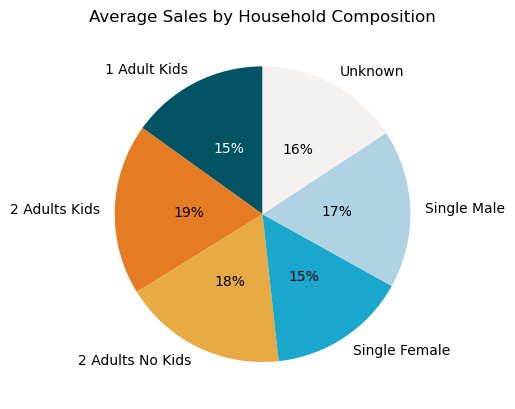

In [17]:
# Visualization of demographic_3

fig, ax = plt.subplots()

patches, text, autotexts = ax.pie(demographic_3["SALES_VALUE"],
                                labels = demographic_3.index,
                                autopct = '%.0f%%',
                                pctdistance = 0.5,
                                colors = ['#025464', '#E57C23', '#E8AA42', 
                                             '#19A7CE', '#AFD3E2', '#F6F1F1'],
                                startangle = 90)
ax.set_title("Average Sales by Household Composition")
autotexts[0].set_color('white')

plt.show

# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [8]:
# Read in the product csv file.
# Only read in product_id and department from product (consider converting columns).

col_list = ["PRODUCT_ID","DEPARTMENT", "COMMODITY_DESC"]
product = pd.read_csv("product.csv",usecols=col_list)

In [9]:
product = product.astype({"PRODUCT_ID": 'int32'})

product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PRODUCT_ID      92353 non-null  int32 
 1   DEPARTMENT      92353 non-null  object
 2   COMMODITY_DESC  92353 non-null  object
dtypes: int32(1), object(2)
memory usage: 1.8+ MB


In [26]:
demo_trans = demo_trans.assign(PRODUCT_ID = transactions["PRODUCT_ID"])

demo_trans

,SALES_VALUE,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HH_COMP_DESC,household_key,PRODUCT_ID
PRODUCT_ID,,,,,,,
NaN,4330.16,45-54,A,50-74K,2 Adults No Kids,7,NaN
1082185.0,1954.34,25-34,U,25-34K,2 Adults Kids,8,1026638.0
1107839.0,2653.21,25-34,U,75-99K,2 Adults Kids,13,915617.0
NaN,1200.11,45-54,B,50-74K,Single Female,16,NaN
NaN,779.06,65+,B,Under 15K,2 Adults No Kids,17,NaN
...,...,...,...,...,...,...,...
906524.0,445.65,35-44,U,50-74K,2 Adults No Kids,2494,821465.0
1118533.0,3059.57,45-54,A,75-99K,Unknown,2496,890612.0
1054326.0,1586.58,45-54,U,35-49K,Single Male,2497,8090565.0


In [100]:
demo_trans.to_excel("demo_trans1.xlsx")

In [10]:
pro_demo_trans = (transactions
                  .merge(demographic, on = 'household_key', how = 'inner')
                  .merge(product, on = 'PRODUCT_ID', how = 'inner')
                  .drop(columns = "QUANTITY")
                 )

pro_demo_trans

,household_key,BASKET_ID,PRODUCT_ID,SALES_VALUE,date,year,month,day_of_week,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HH_COMP_DESC,DEPARTMENT,COMMODITY_DESC
0,1364,26984896261,842930,2.19,2016-01-01,2016,1,4,65+,B,100-124K,Single Female,GROCERY,CONVENIENT BRKFST/WHLSM SNACKS
1,304,27950201718,842930,1.67,2016-03-21,2016,3,0,25-34,U,50-74K,2 Adults No Kids,GROCERY,CONVENIENT BRKFST/WHLSM SNACKS
2,575,34186568032,842930,1.67,2017-04-29,2017,4,5,35-44,U,50-74K,Single Female,GROCERY,CONVENIENT BRKFST/WHLSM SNACKS
3,77,28023861855,842930,5.00,2016-03-27,2016,3,6,35-44,A,100-124K,2 Adults Kids,GROCERY,CONVENIENT BRKFST/WHLSM SNACKS
4,454,42136182098,842930,1.67,2017-11-29,2017,11,2,55-64,U,35-49K,Single Male,GROCERY,CONVENIENT BRKFST/WHLSM SNACKS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161570,540,41413346731,913709,10.99,2017-10-06,2017,10,4,25-34,B,50-74K,Single Female,DRUG GM,MAGAZINE
1161571,540,41587471481,1024615,11.99,2017-10-19,2017,10,3,25-34,B,50-74K,Single Female,DRUG GM,VITAMINS
1161572,540,41587471481,9831733,0.00,2017-10-19,2017,10,3,25-34,B,50-74K,Single Female,DRUG GM,VITAMINS
1161573,540,41834711355,830676,8.99,2017-11-07,2017,11,1,25-34,B,50-74K,Single Female,NUTRITION,FITNESS&DIET


In [11]:
pro_demo_trans = (pro_demo_trans[["AGE_DESC", "DEPARTMENT", 
                             "COMMODITY_DESC", "SALES_VALUE"]]
                 .dropna(axis = 0))

pro_demo_trans

,AGE_DESC,DEPARTMENT,COMMODITY_DESC,SALES_VALUE
0,65+,GROCERY,CONVENIENT BRKFST/WHLSM SNACKS,2.19
1,25-34,GROCERY,CONVENIENT BRKFST/WHLSM SNACKS,1.67
2,35-44,GROCERY,CONVENIENT BRKFST/WHLSM SNACKS,1.67
3,35-44,GROCERY,CONVENIENT BRKFST/WHLSM SNACKS,5.00
4,55-64,GROCERY,CONVENIENT BRKFST/WHLSM SNACKS,1.67
...,...,...,...,...
1161570,25-34,DRUG GM,MAGAZINE,10.99
1161571,25-34,DRUG GM,VITAMINS,11.99
1161572,25-34,DRUG GM,VITAMINS,0.00
1161573,25-34,NUTRITION,FITNESS&DIET,8.99


In [14]:
# The categories were sold the most to the 19-24 aged group

product_1 =(pro_demo_trans[["DEPARTMENT", "SALES_VALUE"]]
            .loc[(pro_demo_trans["AGE_DESC"] == '19-24')]
            .groupby("DEPARTMENT")
            .sum()
            .sort_values("SALES_VALUE", ascending = False)
           )
product_1

,SALES_VALUE
DEPARTMENT,
GROCERY,99008.27
DRUG GM,25297.43
MEAT,11957.34
MEAT-PCKGD,10453.13
PRODUCE,10170.59
KIOSK-GAS,8465.18
DELI,4043.30
SPIRITS,2983.75
PASTRY,2386.73


In [15]:
product_1 = product_1.head(5)

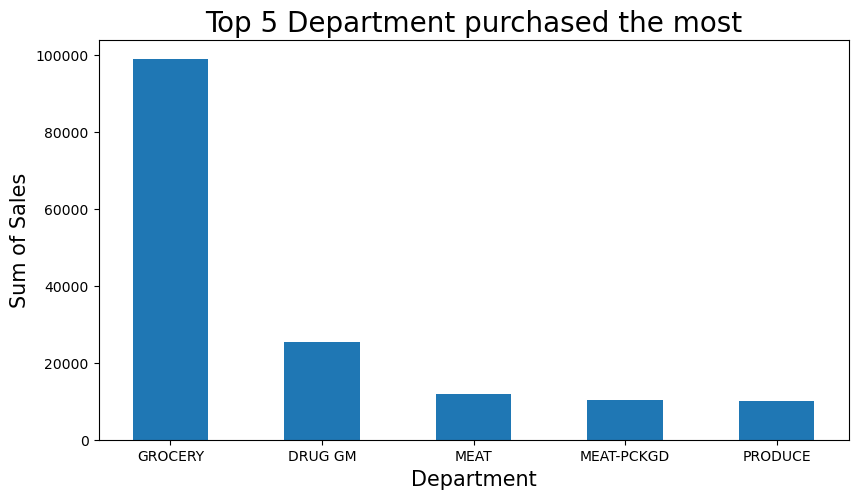

In [26]:
# Visualization of product_1

fig, ax = plt.subplots(figsize = (5,4))
ax = fig.add_axes([0,0,1.5,1])

ax.bar(product_1.index,
      product_1["SALES_VALUE"],
      width = .5)

ax.set_xlabel("Department", fontsize = 15)
ax.set_ylabel("Sum of Sales", fontsize = 15)
ax.set_title("Top 5 Department purchased the most", fontsize = 20)

plt.show()



In [28]:
# Items are purchased the most in the Grocery department at 19-24 age group

product_2 = (pro_demo_trans[["COMMODITY_DESC", "SALES_VALUE"]]
             .loc[(pro_demo_trans["AGE_DESC"] == '19-24') & (pro_demo_trans["DEPARTMENT"] == 'GROCERY')]
             .groupby("COMMODITY_DESC")
             .sum()
             .sort_values("SALES_VALUE", ascending = False)
            )

product_2

,SALES_VALUE
COMMODITY_DESC,
SOFT DRINKS,10014.55
FROZEN PIZZA,5313.50
CHEESE,4566.07
FRZN MEAT/MEAT DINNERS,4353.39
BAG SNACKS,4043.66
...,...
CANNED MILK,61.58
LIQUOR,46.12
SYRUPS/TOPPINGS,38.61


In [29]:
product_2 = product_2.head(5)

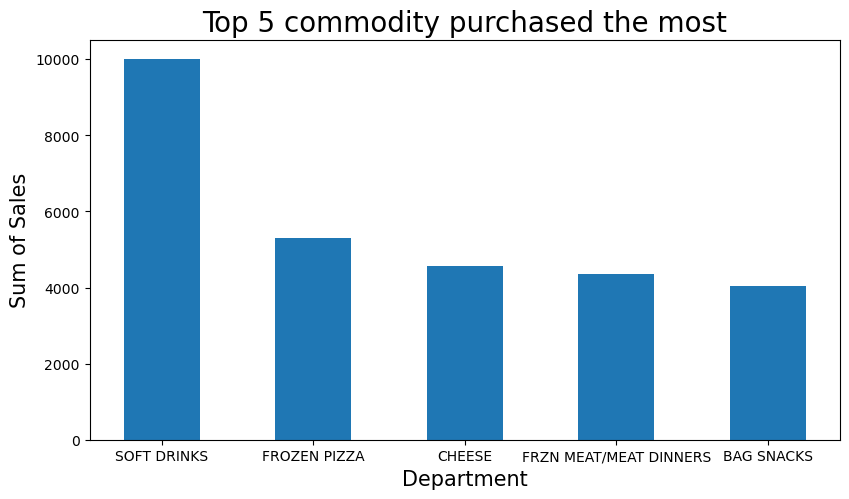

In [30]:
# Visualization of product_2

fig, ax = plt.subplots(figsize = (5,4))
ax = fig.add_axes([0,0,1.5,1])

ax.bar(product_2.index,
      product_2["SALES_VALUE"],
      width = .5)

ax.set_xlabel("Department", fontsize = 15)
ax.set_ylabel("Sum of Sales", fontsize = 15)
ax.set_title("Top 5 commodity purchased the most", fontsize = 20)

plt.show()

# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.